In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
GGAL = yf.download("GGAL.BA",  start="2019-01-01", end="2021-05-15")

[*********************100%***********************]  1 of 1 completed


In [3]:
print(GGAL.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  104.000000  107.699997  101.050003  106.949997  104.650764   
2019-01-03  107.000000  108.099998  103.949997  107.900002  105.580345   
2019-01-04  108.400002  114.650002  108.400002  113.949997  111.500275   
2019-01-07  114.000000  121.000000  113.750000  117.500000  114.973969   
2019-01-08  118.000000  119.000000  113.000000  116.500000  113.995461   

             Volume  
Date                 
2019-01-02   905540  
2019-01-03   830389  
2019-01-04  1896364  
2019-01-07  1835032  
2019-01-08  1077928  


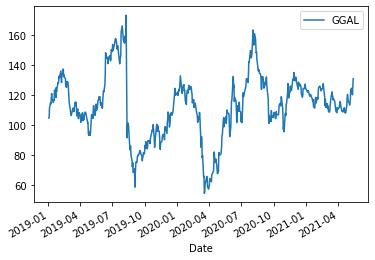

In [4]:
plt.figure()
GGAL["Adj Close"].plot(label="GGAL")
plt.legend()

In [30]:

def getRsi(df,window_length=21):
    GGAL = df.copy()
    GGAL["diff"]=GGAL["Adj Close"].diff(1)
    GGAL['gain'] = GGAL['diff'].clip(lower=0).round(2)
    GGAL['loss'] = GGAL['diff'].clip(upper=0).abs().round(2)
    # Get initial Averages
    GGAL['avg_gain'] = GGAL['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
    GGAL['avg_loss'] = GGAL['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

    # Get WMS averages
    # Average Gains
    for i, row in enumerate(GGAL['avg_gain'].iloc[window_length+1:]):
        GGAL['avg_gain'].iloc[i + window_length + 1] =(GGAL['avg_gain'].iloc[i + window_length] *(window_length - 1) + GGAL['gain'].iloc[i + window_length + 1])/ window_length
    # Average Losses
    for i, row in enumerate(GGAL['avg_loss'].iloc[window_length+1:]):
        GGAL['avg_loss'].iloc[i + window_length + 1] =(GGAL['avg_loss'].iloc[i + window_length] *(window_length - 1) + GGAL['loss'].iloc[i + window_length + 1])/ window_length

    GGAL['rs'] = GGAL['avg_gain'] / GGAL['avg_loss']
    GGAL['rsi'] = 100 - (100 / (1.0 + GGAL['rs']))
    return GGAL

In [31]:
def backTest(df,sell=60,buy=30):
    balance = df['Adj Close'][0]
    position = 0
    status = 0
    balpol = np.zeros(len(df))
    last_buy = 0
    stoploss=0
    for i in range(len(df)):
        if df['rsi'][i] < buy and status == 0:
           # print("BUY!"+"RSI="+str(df['rsi'][i])+"i = "+str(i))
            #print("BALANCE:0")
            #print("i = "+str(i))
           # print("RSI="+str(df['rsi'][i]))
            status = 1
            position = balance/df['Adj Close'][i]
            last_buy=df['Adj Close'][i]
            balance = 0
            #print("POS:"+str(position))
        if df['rsi'][i] > sell and status == 1:
           # print("SELL"+"RSI="+str(df['rsi'][i])+"i = "+str(i))
            #print("i = "+str(i))
            #print("RSI="+str(df['rsi'][i]))
            #print()
            status = 0
            balance = position*df['Adj Close'][i]
            #print("BALANCE="+str(balance))
            position = 0
        if status == 1 and df['Adj Close'][i]<stoploss*last_buy:
            print("SELLOFFFFF")
            status = 0
            balance = position*df['Adj Close'][i]
            #print("BALANCE="+str(balance))
            position = 0
        #if status == 1:
         #   print(df['Adj Close'][i]/0.95*stoploss)
        balpol[i] = position*df['Adj Close'][i]+balance
    return (position*df['Adj Close'][i]+balance)/df['Adj Close'][0],balpol
        

[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


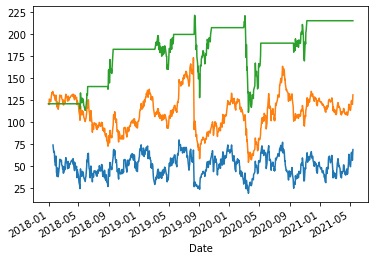

0.017775535674676334
1.0832889311328027


In [19]:
GGAL = yf.download("GGAL.BA",  start="2018-01-01", end="2021-05-15")
GGAL = getRsi(GGAL)
result,ret=backTest(GGAL,sell=60,buy=30)
GGAL["ret"] = ret
plt.figure()
GGAL["rsi"].plot()
GGAL['Adj Close'].plot()
GGAL['ret'].plot()
plt.show()
print(result/100)
print(GGAL['Adj Close'][len(GGAL)-1]/GGAL['Adj Close'][0])

[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


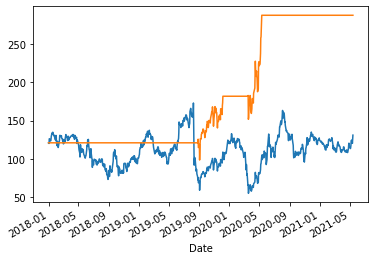

2.3834346291719717
1.083288862735491
[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


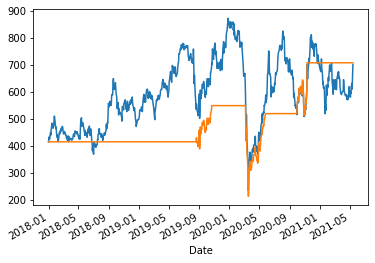

1.7030050824661698
1.6881219856862568
[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


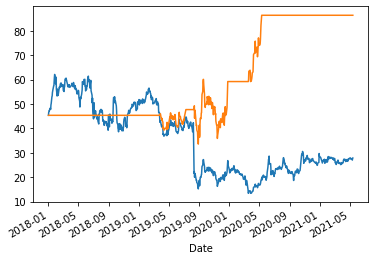

1.903888813461238
0.6141124877294601
[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


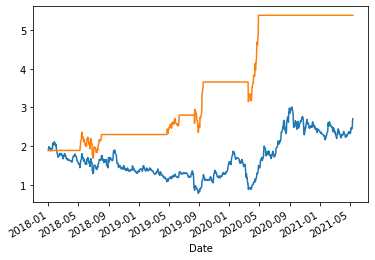

2.8531982473953375
1.4334307106904316
[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


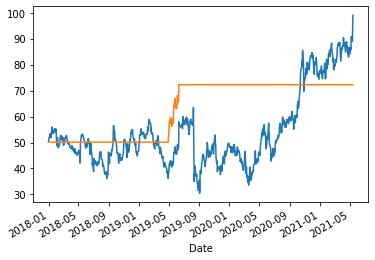

1.4406077465961993
1.9740777066360213
[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


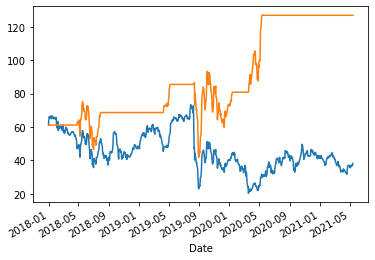

2.0767398946993363
0.6241136495611738
[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


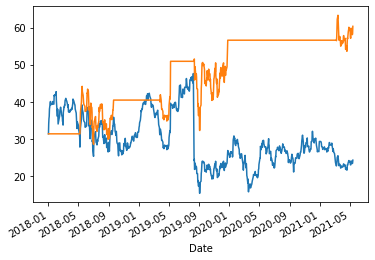

1.9271533677769825
0.7728660381655819
[*********************100%***********************]  1 of 1 completed


C:\Users\sutto\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


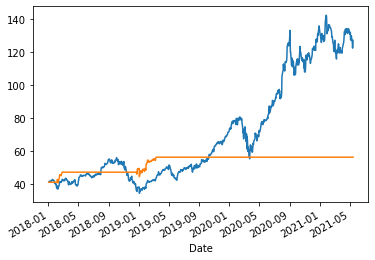

1.3687683930345982
3.0852036458377645


In [32]:
tickers=["GGAL.BA","YPFD.BA","EDN.BA","COME.BA","PAMP.BA","TGNO4.BA","TRAN.BA","AAPL"]
for ticker in tickers:
    df = yf.download(ticker,  start="2018-01-01", end="2021-05-15")
    df = getRsi(df)
    result,ret=backTest(df,sell=60,buy=30)
    df["ret"] = ret
    plt.figure()
    #df["rsi"].plot()
    df['Adj Close'].plot()
    df['ret'].plot()
    plt.show()
    print(result)
    print(df['Adj Close'][len(df)-1]/df['Adj Close'][0])

In [74]:
AL30D = yf.download("AL30D.BA",start="2018-01-01", end="2021-05-15")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AL30D.BA: No data found, symbol may be delisted


In [23]:
MEP = pd.read_csv('hist_DOLAR MEP20210924.csv')

In [24]:
MEP.set_index('fecha')
print(MEP.head())

        fecha  apertura  maximo  minimo  cierre  volumen  openint
0  2017-12-29       NaN     NaN     NaN   18.63      NaN        0
1  2018-09-28       NaN     NaN     NaN   41.48      NaN        0
2  2018-10-29       NaN     NaN     NaN   36.97      NaN        0
3  2018-10-30       0.0     0.0     0.0   36.63      NaN        0
4  2018-10-31       0.0     0.0     0.0   35.93      NaN        0


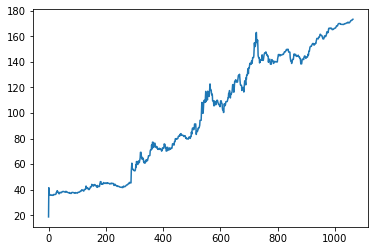

4.180810028929605


In [26]:
plt.figure()
MEP["cierre"].plot()
plt.show()
print(MEP["cierre"][len(MEP)-1]/MEP["cierre"][1])